## libs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from pathlib import Path
from scipy.interpolate import interp1d

## initialization

In [72]:
CLUSTER = 'NGC_6405'

In [73]:
STARS_DIRECTORY = Path('../sessions/')
ISOCHRONES_DIRECTORY = Path ('../isochrones/')
MAIN_DIRECTORY = Path('../')

In [74]:
def read_file(filename):
    df = pd.read_csv(filename, delimiter='\\s+')
    df = df.apply(pd.to_numeric, errors='coerce')
    try:
        df.dropna(subset = ['phot_g_mean_mag','bp_rp'], inplace = True)
    except:
        pass
    return df

In [75]:
clusters_list = pd.read_excel(MAIN_DIRECTORY/'cluster_list_raw.xlsx', sheet_name=0, usecols=5, index_col = 0)

In [98]:
cluster_data = read_file(STARS_DIRECTORY / f'{CLUSTER}_selected_2')
AGE = clusters_list.loc[f'{CLUSTER}','Age']
isochrone = read_file(ISOCHRONES_DIRECTORY / (f'{CLUSTER}_{AGE}.txt'))
isochrone_ZAMS = read_file(ISOCHRONES_DIRECTORY / ('isochrone_4e7.txt'))

## transition from apparent to absolute magnitude 

In [99]:
A_G = 2.749632 * (clusters_list.loc[f'{CLUSTER}','E(B-V)'])
A_BP = 3.417408 * (clusters_list.loc[f'{CLUSTER}','E(B-V)'])
A_RP = 2.086368 * (clusters_list.loc[f'{CLUSTER}','E(B-V)'])

cluster_data['Gmag'] = cluster_data['phot_g_mean_mag'] + 5 - 5 * np.log10(clusters_list.loc[f'{CLUSTER}','Distance']) - A_G
cluster_data['BP_RP'] = cluster_data['bp_rp'] - A_BP + A_RP

In [100]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')

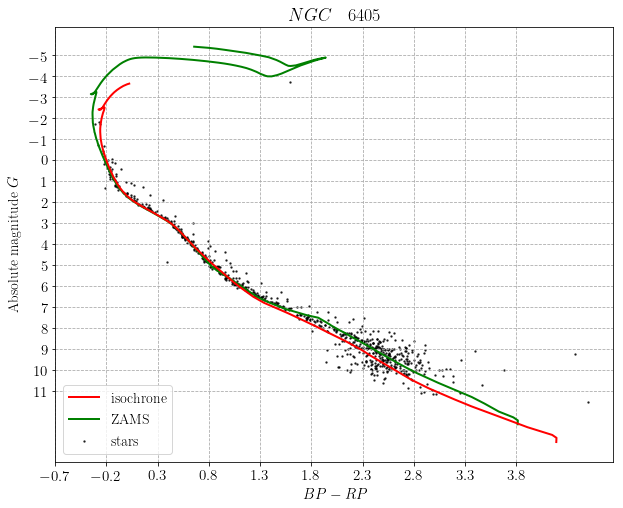

In [101]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(cluster_data['BP_RP'],
            cluster_data['Gmag'],
            c='black', s=2, label='stars', zorder=1, alpha=0.7)
ax.plot(isochrone['G_BPmag'] - isochrone['G_RPmag'],
            isochrone['Gmag'],
            c='red', lw=2, label='isochrone', zorder=100)
ax.plot(isochrone_ZAMS['G_BPmag'] - isochrone_ZAMS['G_RPmag'],
            isochrone_ZAMS['Gmag'],
            c='green', lw=2, label='ZAMS', zorder=50)

ax.invert_yaxis()
ax.grid(c='#aaaaaa', ls='--')

ax.set_xlabel('$BP-RP$')
ax.set_ylabel('Absolute magnitude $G$', labelpad=8)


ax.tick_params(axis='both', which='major')

plt.yticks(np.arange(int(isochrone_ZAMS['Gmag'].min()), int(isochrone_ZAMS['Gmag'].max()), 1))
plt.xticks(np.arange(-0.7, 4, 0.5))
ax.legend(loc='lower left')

title  = CLUSTER.replace('_','\quad')
ax.set_title(f'${title}$')
plt.savefig(f'{CLUSTER}_CMD+ZAMS.pdf')

In [89]:
18 + 5 - 5 * np.log10(clusters_list.loc[f'{CLUSTER}','Distance']) - A_G

9.076775383123282